# Customer Churn Telecom

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk 
import seaborn as sns

In [2]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.shape

(7043, 21)

# Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
# 11 rows with TotalCharges == ' '
df.drop(index=df[ df['TotalCharges']==' '].index, axis=0, inplace=True)

In [7]:
df.drop(['customerID'],axis=1, inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype("float64")

In [8]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype("category")

In [9]:
for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = df[c].astype("category")        

In [10]:
df['Churn'] = df['Churn'].cat.codes

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   category
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   category
 16  PaymentMethod     7032 n

In [12]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2618,Male,0,Yes,Yes,25,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,19.90,505.45,0
297,Male,1,Yes,No,35,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.80,3437.50,0
3959,Male,0,No,No,59,Yes,No,DSL,No,No,Yes,No,No,Yes,One year,Yes,Bank transfer (automatic),61.35,3645.50,0
4929,Male,1,Yes,No,63,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),84.00,5329.55,0
5176,Female,0,No,Yes,26,No,No phone service,DSL,Yes,No,No,Yes,No,Yes,Month-to-month,No,Mailed check,45.80,1147.00,0


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
Churn,7032.0,0.265785,0.441782,0.00,0.0000,0.000,1.0000,1.00


In [14]:
df.isnull().sum().sort_values(ascending=False)

gender              0
SeniorCitizen       0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
Churn               0
dtype: int64

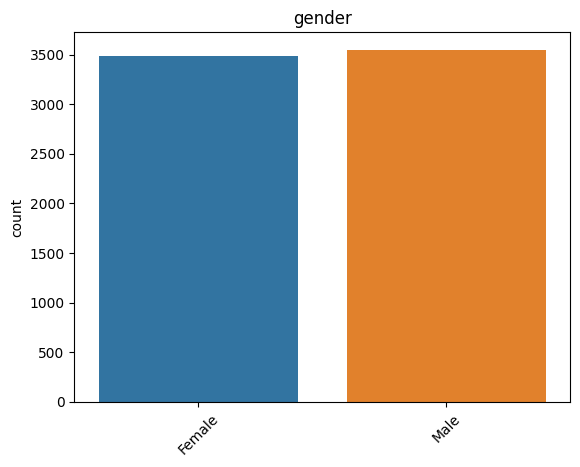

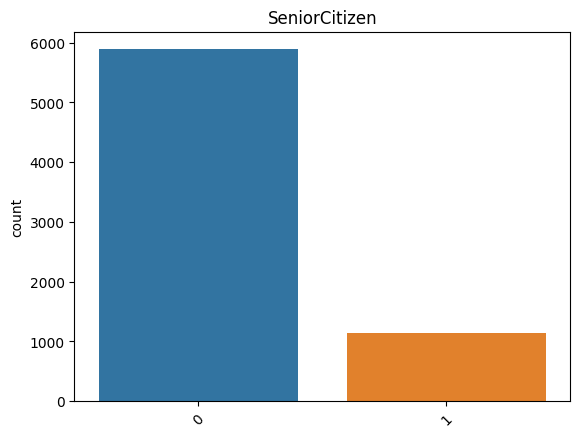

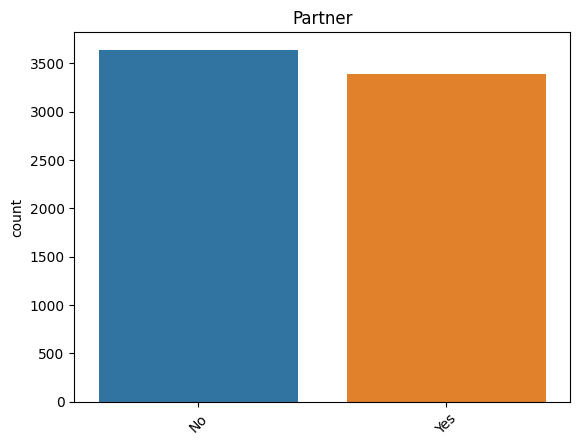

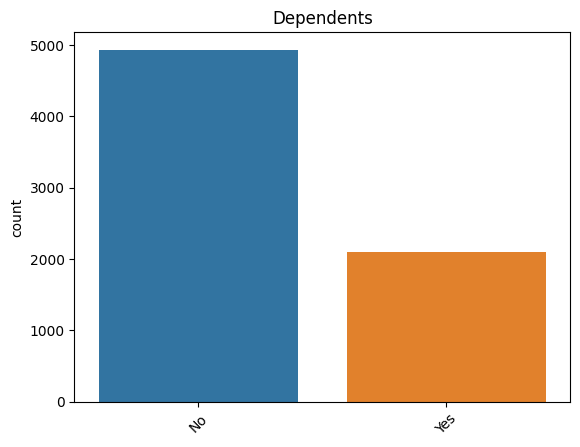

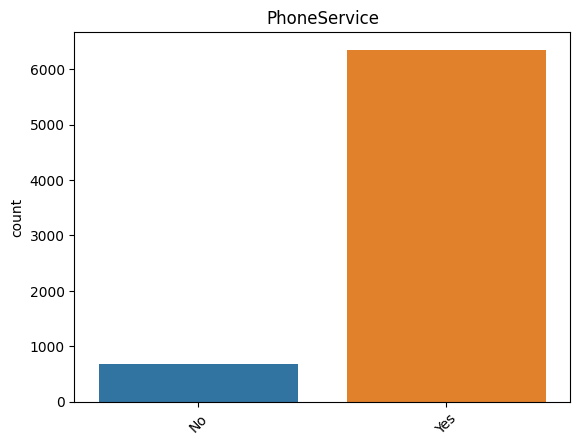

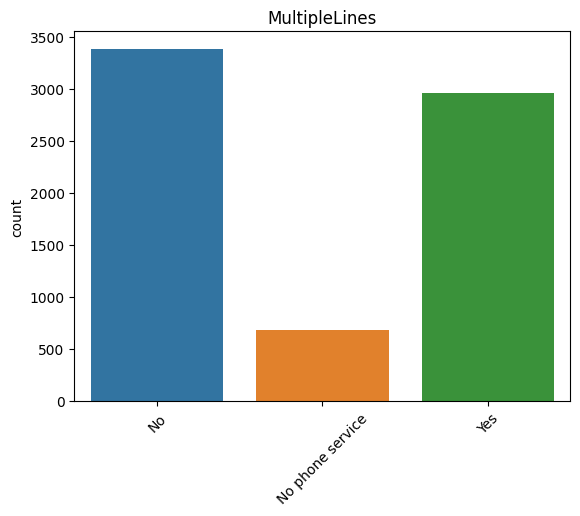

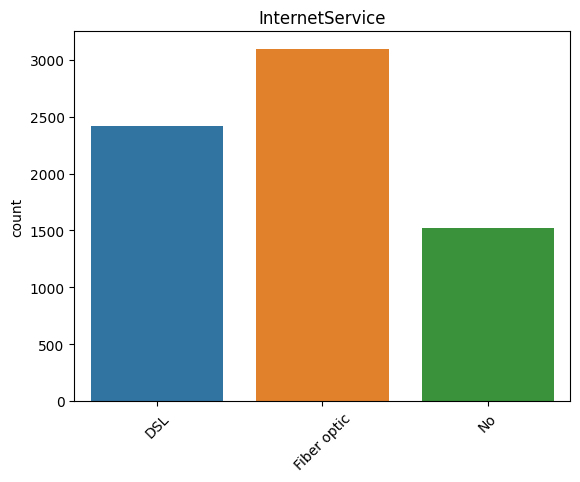

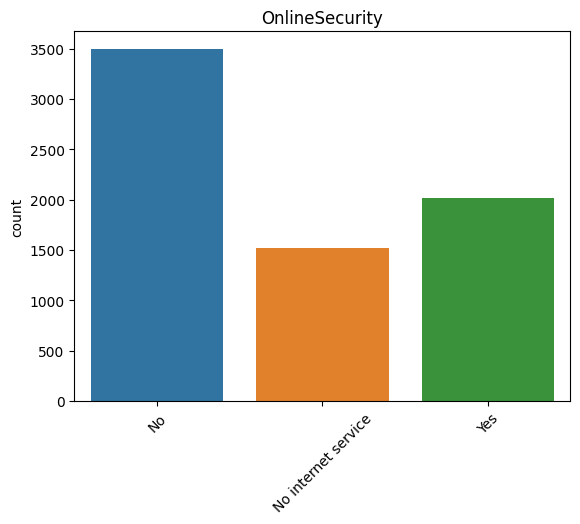

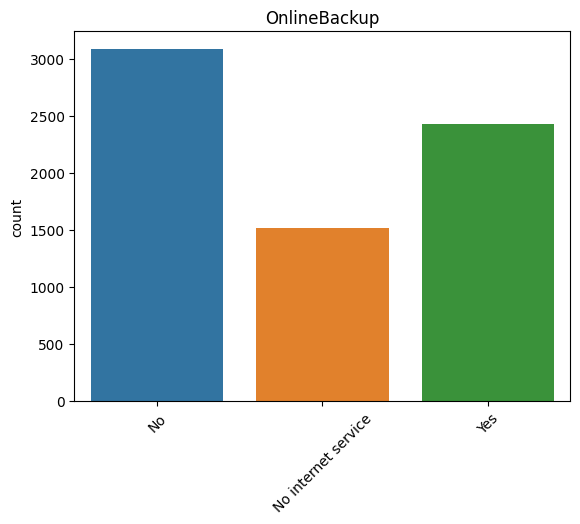

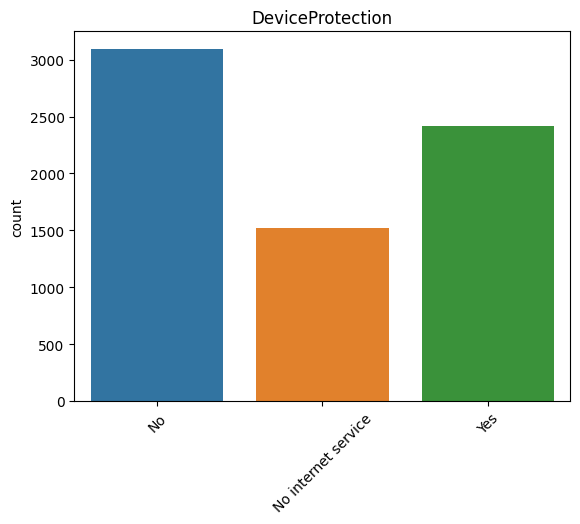

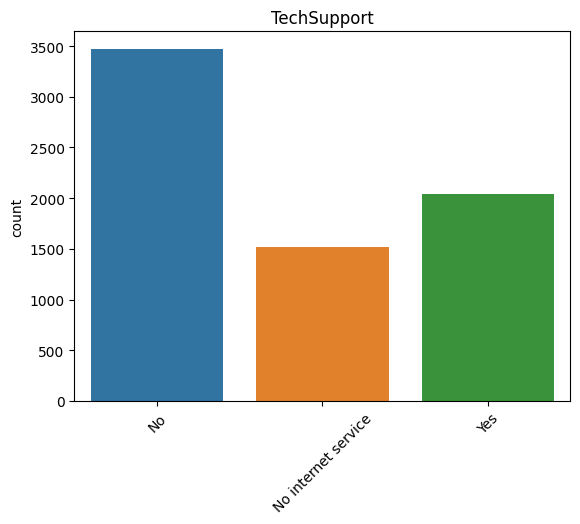

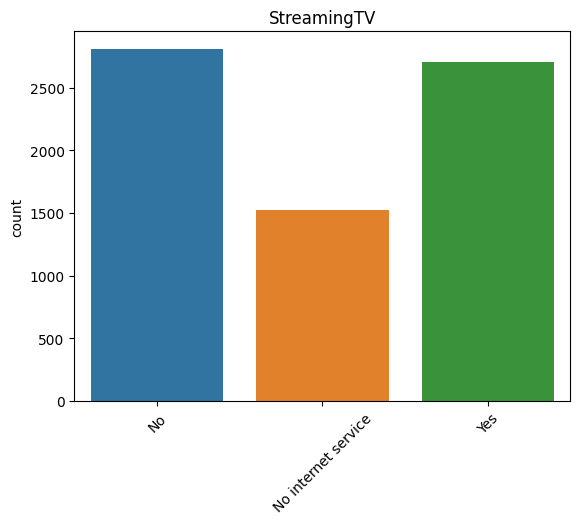

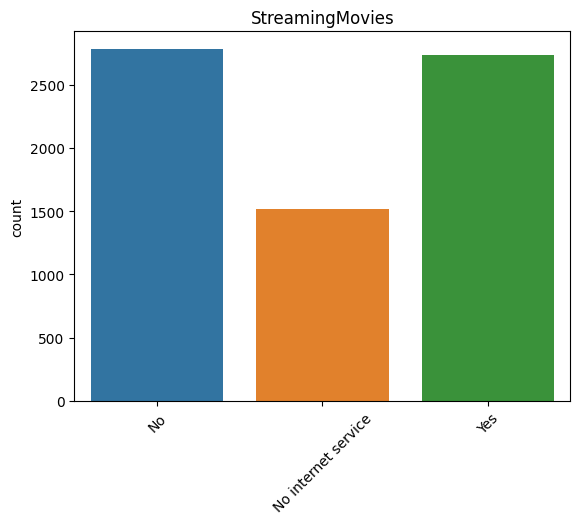

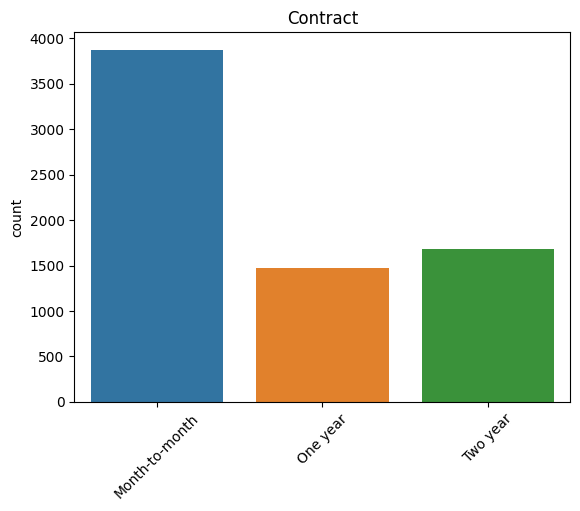

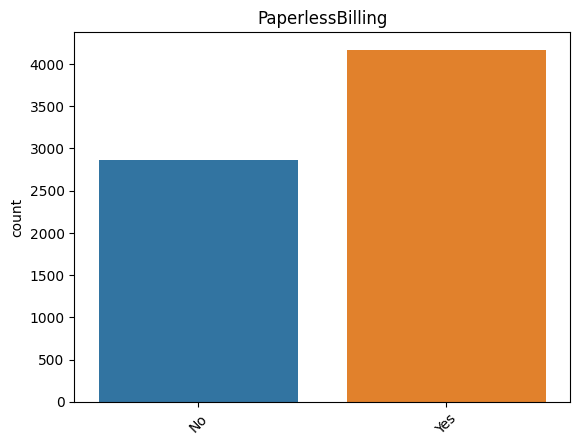

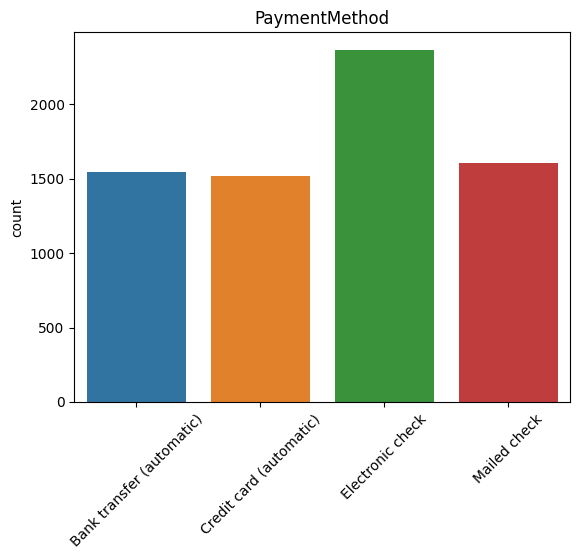

In [15]:
for c in df.columns:
    if df[c].dtypes == 'category':
        sns.countplot(x=c, data=df)
        plt.title(c)
        plt.xlabel('')
        plt.xticks(rotation=45)
        plt.show()

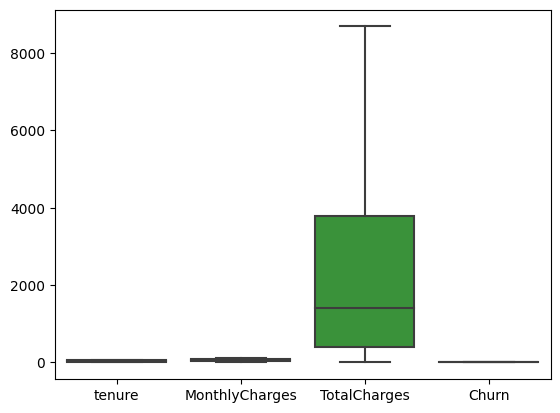

In [16]:
plt.figure()
sns.boxplot(data=df)
plt.show()

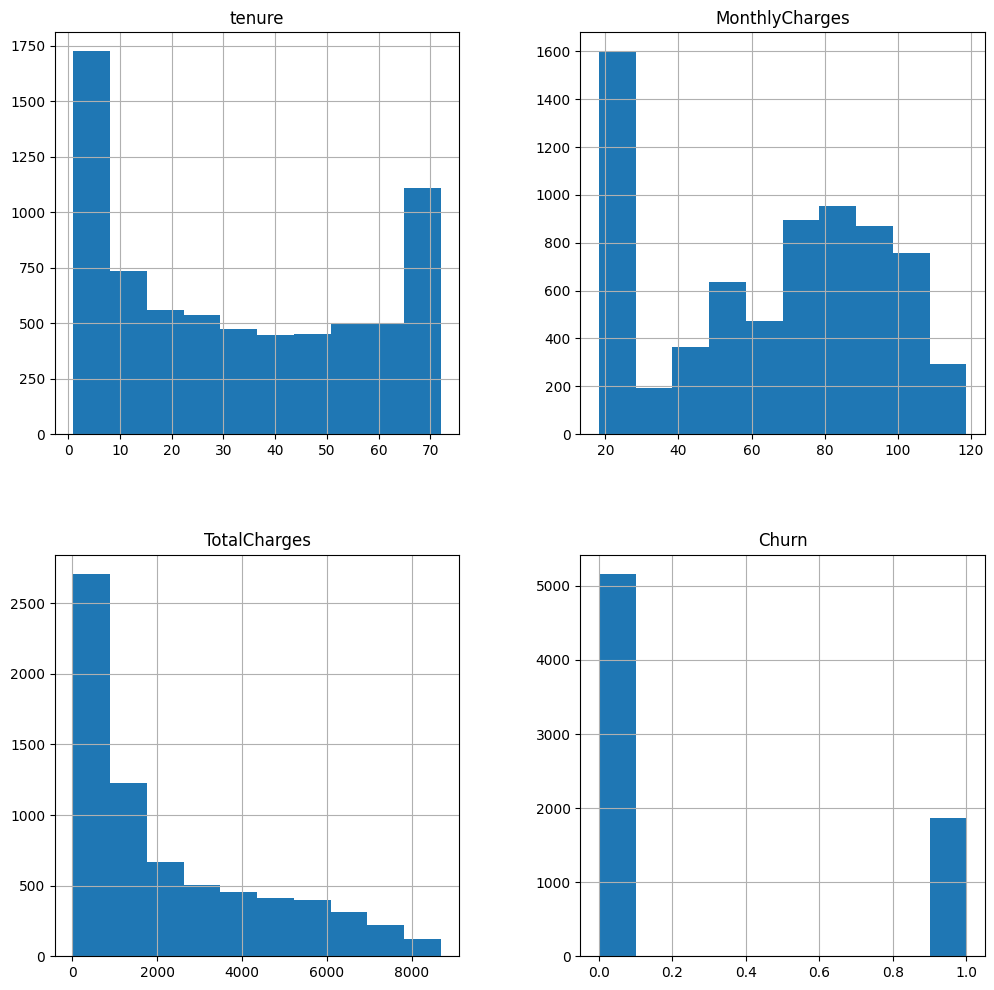

In [17]:
df.hist(figsize=(12, 12))
plt.show()

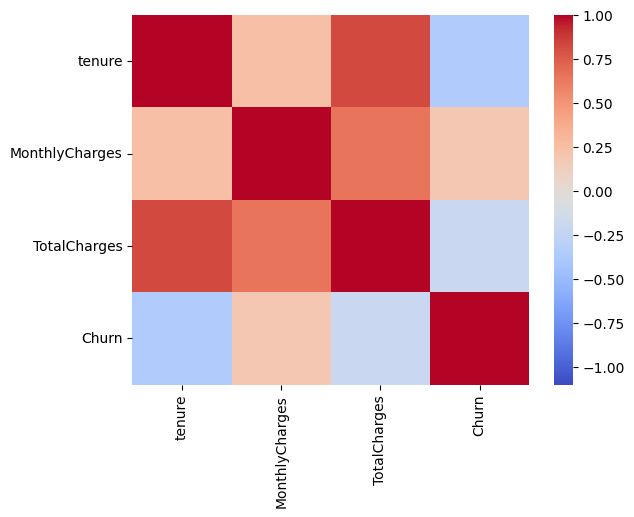

In [18]:
cor = df.corr(numeric_only=True)
sns.heatmap(cor, cmap="coolwarm", vmin=1, vmax=-1)
plt.show()

In [19]:
df_enc = df.copy()
df_enc = pd.get_dummies(df)
df_enc.info()

#for c in df_enc.columns:
#    if df[c].dtype == 'category':
#        df_enc[c] = df[c].cat.codes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int8   
 4   gender_Female                            7032 non-null   uint8  
 5   gender_Male                              7032 non-null   uint8  
 6   SeniorCitizen_0                          7032 non-null   uint8  
 7   SeniorCitizen_1                          7032 non-null   uint8  
 8   Partner_No                               7032 non-null   uint8  
 9   Partner_Yes                              7032 non-null   uint8  
 10  Dependents_No                            7032 no

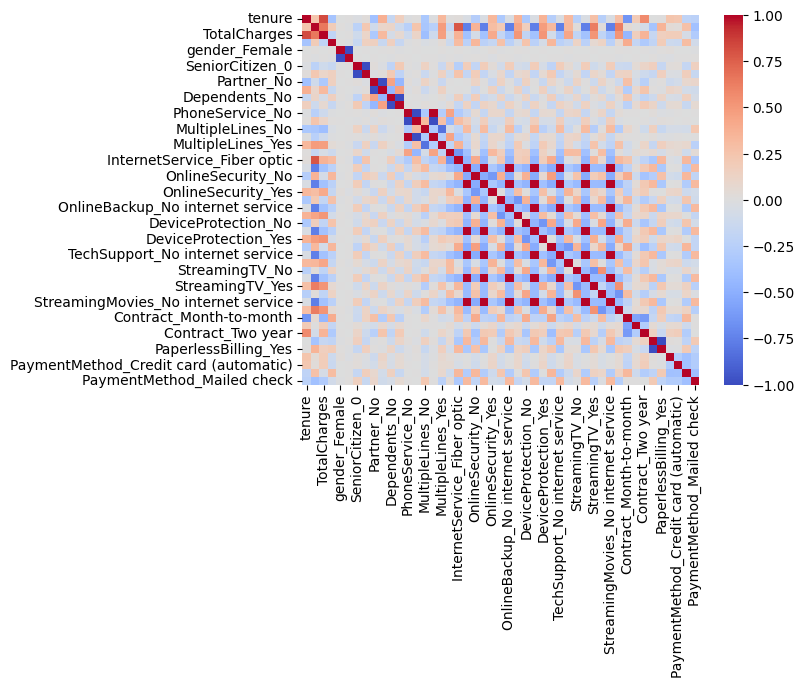

In [20]:
cor2 = df_enc.corr(numeric_only=True)
sns.heatmap(cor2, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

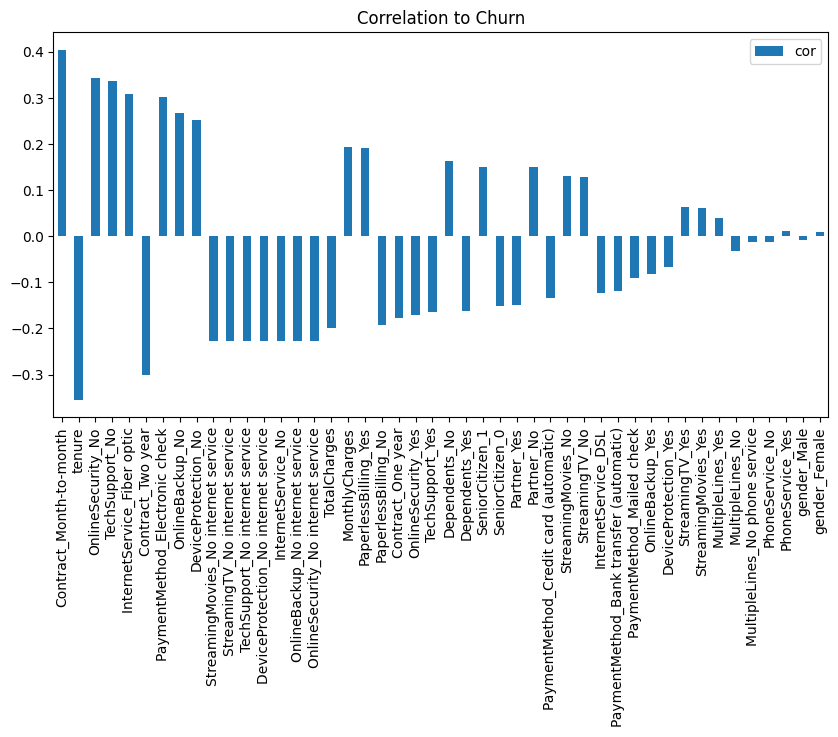

Top 20 Parameters Correlated to Churn
-----------------------------------------------
Contract_Month-to-month                 0.404565
tenure                                 -0.354049
OnlineSecurity_No                       0.342235
TechSupport_No                          0.336877
InternetService_Fiber optic             0.307463
Contract_Two year                      -0.301552
PaymentMethod_Electronic check          0.301455
OnlineBackup_No                         0.267595
DeviceProtection_No                     0.252056
StreamingMovies_No internet service    -0.227578
StreamingTV_No internet service        -0.227578
TechSupport_No internet service        -0.227578
DeviceProtection_No internet service   -0.227578
InternetService_No                     -0.227578
OnlineBackup_No internet service       -0.227578
OnlineSecurity_No internet service     -0.227578
TotalCharges                           -0.199484
MonthlyCharges                          0.192858
PaperlessBilling_Yes            

In [27]:
c2 = pd.DataFrame({
    "cor": cor2['Churn'],
    "abs_cor": abs(cor2['Churn'])
})
c2.sort_values(by="abs_cor", ascending=False, inplace=True)
c2[1:].plot.bar(y="cor", figsize=(10,5))
plt.title("Correlation to Churn")
plt.show()
print("Top 20 Parameters Correlated to Churn")
print("-----------------------------------------------")
print(c2.iloc[1:21, 0])

# Model Training

In [23]:
X = df_enc.drop("Churn", axis=1)
y = df_enc['Churn']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (5274, 46)
Shape of X_test: (1758, 46)


In [36]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

models = {
    'logit': LogisticRegression(random_state=0),
    'cart': DecisionTreeClassifier(random_state=0),
    'rf': RandomForestClassifier(random_state=0),
    'lda': LinearDiscriminantAnalysis(n_components=1), 
    'knn': KNeighborsClassifier(n_neighbors=2)
}

for k, m in models.items():
    m.fit(X_train, y_train)
    score = m.score(X_test, y_test)
    print(f"{k:<6}: {score:>5.3f}")
    

logit : 0.812
cart  : 0.718
rf    : 0.792
lda   : 0.804
knn   : 0.746
